In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob
import os
from pathlib import Path

from tensorflow.keras.layers import Dense,Flatten,Lambda,Input
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_path = '/content/drive/MyDrive/Ineuron/Deep Learning/Dataset'

In [4]:
os.chdir(root_path)
os.getcwd()

'/content/drive/MyDrive/Ineuron/Deep Learning/Dataset'

In [5]:
IMAGE_SIZE = [224,224]

train_path = 'cat_dog_classification/train'
validation_path = 'cat_dog_classification/test'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
for layer in vgg.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [9]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
folders = glob('cat_dog_classification/train/*')

In [11]:
folders

['cat_dog_classification/train/dogs', 'cat_dog_classification/train/cats']

In [12]:
model = Sequential()

model.add(vgg)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [14]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#Data Augumentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory('cat_dog_classification/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode = 'categorical'
                                                 )

Found 557 images belonging to 2 classes.


In [17]:
test_set = train_datagen.flow_from_directory('cat_dog_classification/test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode = 'categorical'
                                                 )

Found 140 images belonging to 2 classes.


In [19]:
history = model.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
18/18 [==============================] - 402s 22s/step - loss: 0.5444 - accuracy: 0.7828 - val_loss: 0.5376 - val_accuracy: 0.7714
Epoch 2/10
18/18 [==============================] - 388s 22s/step - loss: 0.2323 - accuracy: 0.8995 - val_loss: 0.4954 - val_accuracy: 0.7429
Epoch 3/10
18/18 [==============================] - 387s 22s/step - loss: 0.1976 - accuracy: 0.9282 - val_loss: 0.4112 - val_accuracy: 0.7929
Epoch 4/10
18/18 [==============================] - 384s 21s/step - loss: 0.1479 - accuracy: 0.9515 - val_loss: 0.4702 - val_accuracy: 0.8071
Epoch 5/10
18/18 [==============================] - 383s 21s/step - loss: 0.1390 - accuracy: 0.9479 - val_loss: 0.3372 - val_accuracy: 0.8143
Epoch 6/10
18/18 [==============================] - 384s 21s/step - loss: 0.1072 - accuracy: 0.9623 - val_loss: 0.4085 - val_accuracy: 0.8000
Epoch 7/10
18/18 [==============================] - 385s 22s/step - loss: 0.0978 - accuracy: 0.9641 - val_loss: 0.4268 - val_accuracy: 0.7929
Epoch 

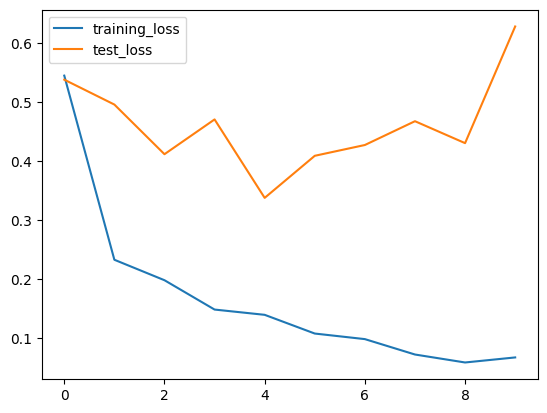

In [20]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

In [94]:
model.save('model_vgg16.keras')

In [22]:
y_pred = model.predict(test_set)

5/5 [==============================] - 81s 15s/step


In [23]:
y_pred

array([[9.9578321e-01, 3.0580610e-03],
       [9.6781862e-01, 3.1334307e-02],
       [9.1007489e-01, 7.3439755e-02],
       [1.1460757e-02, 9.9669313e-01],
       [4.1426104e-02, 9.9280113e-01],
       [1.5093735e-06, 1.0000000e+00],
       [3.8332513e-01, 7.9907238e-01],
       [9.9654078e-02, 9.6256077e-01],
       [2.0754645e-03, 9.9956083e-01],
       [8.8828939e-01, 1.3459189e-01],
       [1.0726309e-01, 9.5332295e-01],
       [5.0402272e-02, 9.9212939e-01],
       [9.6252076e-03, 9.9757969e-01],
       [9.5651135e-02, 9.6712744e-01],
       [9.8804134e-01, 5.0024078e-03],
       [8.1080096e-03, 9.9873346e-01],
       [9.9797660e-01, 6.9955050e-04],
       [9.0423328e-01, 9.6858189e-02],
       [1.4504044e-01, 9.5427364e-01],
       [9.9995929e-01, 1.2450417e-05],
       [6.3913693e-03, 9.9943340e-01],
       [9.7404486e-01, 2.2466131e-02],
       [2.1216427e-01, 9.2069703e-01],
       [1.1334031e-01, 9.3451023e-01],
       [8.5430510e-02, 9.7325796e-01],
       [7.7584374e-01, 2.

In [24]:
y_pred = np.argmax(y_pred,axis=1)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0])

In [95]:
model = load_model('model_vgg16.keras')

In [106]:
img = image.load_img('/content/drive/MyDrive/Ineuron/Deep Learning/2.jpg',target_size=(224,224))


In [107]:
x = image.img_to_array(img)

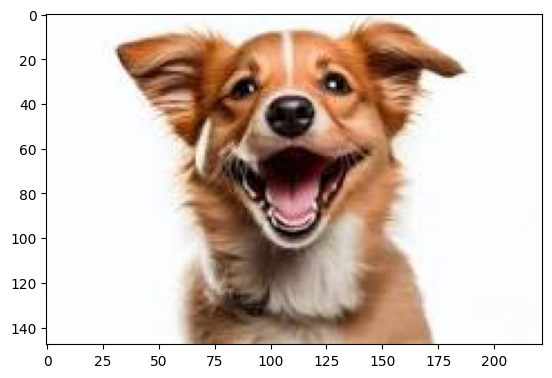

In [108]:
z = plt.imread('/content/drive/MyDrive/Ineuron/Deep Learning/2.jpg')
plt.imshow(z)

In [109]:
x.shape

(224, 224, 3)

In [110]:
x=x/255

In [111]:
from keras.applications.vgg16 import preprocess_input

x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [112]:
model.predict(img_data)

1/1 [==============================] - 1s 828ms/step


array([[0.4902501 , 0.01067721]], dtype=float32)

In [113]:
a = np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 477ms/step


In [114]:
print(a)

[0]


In [115]:
names = ['dog','cat']
names[a[0]]

'dog'

In [48]:
def custom_image(path):
  img = image.load_img(path,target_size=(224,224))
  x = image.img_to_array(img)
  x=x/255
  x = np.expand_dims(x,axis=0)
  img_data = preprocess_input(x)
  model.predict(img_data)
  a = np.argmax(model.predict(img_data),axis=1)

  return a


In [116]:
names[custom_image('/content/drive/MyDrive/Ineuron/Deep Learning/2.jpg')[0]]

1/1 [==============================] - 0s 462ms/step


'dog'